In [102]:
import cv2
import numpy as np 
import matplotlib.pyplot as plt
import random
import csv

def distance(row_img, row_centers): return (np.sum((row_centers-row_img)**2))

def calculate_clusters(img, centers): 
    
    clusters = np.zeros((img.shape[0]))

    for ind in range(clusters.shape[0]): 

        aux = []
        for index_clusters in range(k): aux.append(distance(img[ind], centers[index_clusters]))
        clusters[ind] = np.argmin(aux)

    return clusters

def calculate_centers(img, centers, clusters): 

    for col in range(3): 
            plane = img[:,col]

            for cl in range(k): 
                aux = []
                for i in range(len(clusters)): 
                    if int(clusters[i]) == cl: aux.append(plane[i])
                
                if len(aux) > 0 : centers[cl,col] = np.mean(aux)

    return centers

def fill_image(img, centers, clusters):
    
    for cl in range(k): 
        for i in range(len(clusters)): 
            if int(clusters[i]) == cl: img[i] = centers[cl]

    return img

def find_red(centers): 
    r = []

    for row_c in centers: 
        val = row_c[0] -(row_c[1] + row_c[2])
        r.append(val)

    red = np.argmax(r)

    for i in range(len(centers)): 
        if i != red: centers[i] = [0, 0, 0]

    return centers

def rgb2gray(imagen):
    rows,cols,_=imagen.shape 
    imgGray=np.zeros((rows,cols,1), dtype=np.uint8)
    for i in range(rows):
        for j in range(cols):
            
            b = imagen.item(i, j, 0)
            g = imagen.item(i, j, 1)
            r = imagen.item(i, j, 2)
           
            pixel=0.2989 * r + 0.5870 * g + 0.1140 * b 
           
            imgGray[i,j]=pixel
    return imgGray.astype(np.uint8)

def find_center(obj): 

    listx, listy = [], []

    for i in range(obj.shape[0]): 
        for j in range(obj.shape[1]): 

            if obj[i,j] > 0: 
                listx.append(j)
                listy.append(i)


    minx, maxX = min(listx), max(listx)
    centerX = int((minx + maxX)/2)

    miny, maxy = min(listy), max(listy)
    centerY = int((miny + maxy)/2)

    return centerX, centerY, listx, listy


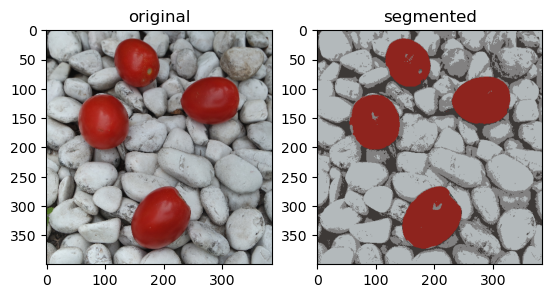

In [103]:
original = cv2.imread("jit.JPG") 
image = cv2.resize(original, (385, 400)) 
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

img = np.copy(image)
img = img.reshape((-1,3))

k = 4

iteraciones = 20

centers = np.zeros((k, 3))

random.seed(200)

for i in range(centers.shape[0]): 
    for j in range(centers.shape[1]): 
        centers [i,j] = random.randint(0,255)


for iter in range(iteraciones): 

    aux_center = [list(elem) for elem in centers.astype(int)]

    clusters = calculate_clusters(img, centers)

    centers = calculate_centers(img, centers, clusters)
    
    aux2 = [list(elem) for elem in centers.astype(int)]

    if (aux_center == aux2): break


img = fill_image(img, centers, clusters)

img_s = np.copy(img)

img = np.uint8(img.reshape(image.shape))

plt.figure()
plt.subplot(1,2,1)
plt.title('original')
plt.imshow(image)
plt.subplot(1,2,2)
plt.title('segmented')
plt.imshow(img)

plt.show()

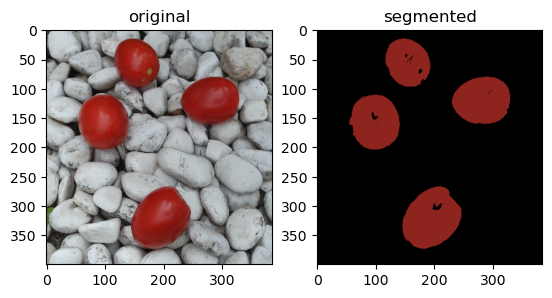

In [104]:
centers = find_red(centers)

img_s = fill_image(img_s, centers, clusters)
img_s = np.uint8(img_s.reshape(image.shape))

plt.figure()
plt.subplot(1,2,1)
plt.title('original')
plt.imshow(image)
plt.subplot(1,2,2)
plt.title('segmented')
plt.imshow(img_s)

plt.show()

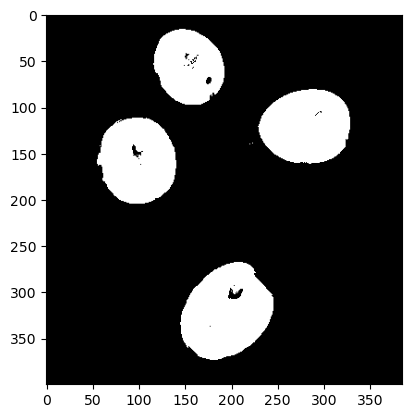

In [105]:

gray = rgb2gray(img_s)

for i in range(gray.shape[0]): 
    for j in range(gray.shape[1]): 
        if gray[i,j] > 0: gray[i,j] = 255

plt.imshow(gray, cmap='gray')


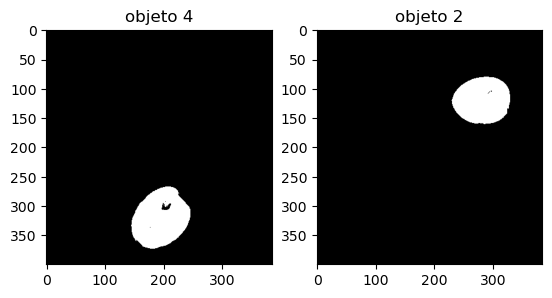

In [106]:
obj4, obj2 = np.zeros((gray.shape)), np.zeros((gray.shape))

f, f2 = 0, 0 

for i in range(gray.shape[0]-1,0,-1): 
    
    obj4[i] = gray[i]

    if np.sum(gray[i]) > 0 : 
        f = 1 
    elif (np.sum(gray[i]) == 0) & (f == 1):
        break

f, f2 = 0, 0 
s = int(gray.shape[1] / 2)

for j in range(gray.shape[1]-1,0,-1): 

    obj2[0:s,j] = gray[0:s,j]

    if np.sum(gray[0:s,j]) > 0 : 
        f = 1 
    elif (np.sum(gray[0:s,j]) == 0) & (f == 1):
        break


plt.figure()
plt.subplot(1,2,1)
plt.title('objeto 4')
plt.imshow(obj4, cmap='gray')
plt.subplot(1,2,2)
plt.title('objeto 2')
plt.imshow(obj2, cmap='gray')

plt.show()

Distance object 2 =  99 pixels
Distance object 4 =  102 pixels


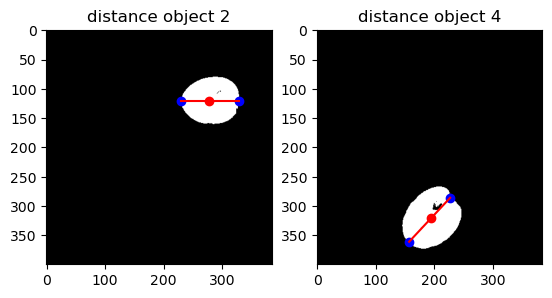

In [107]:

x4, y4, listx_4, listy_4 = find_center(obj4)
x2, y2, listx_2, listy_2 = find_center(obj2)

corner1_4 = max(listy_4), min(listx_4)

f = 0
while(f == 0): 
    if obj4[corner1_4] > 0: break
    i, j = corner1_4[0] -1 , corner1_4[1] + 1
    corner1_4 = (i,j)

corner2_4 = min(listy_4), max(listx_4)

f = 0
while(f == 0): 
    if obj4[corner2_4] > 0: break
    i, j = corner2_4[0] + 1 , corner2_4[1] - 1
    corner2_4 = (i,j)
    

x4_d,y4_d =[corner1_4[1], corner2_4[1]], [corner1_4[0], corner2_4[0]]

distance_4 = int(((x4_d[0]-x4_d[1])**2 + (y4_d[0]-y4_d[1])**2 )**0.5)

## para objeto 2
corner1_2 = (y2, min(listx_2))
corner2_2 = (y2, max(listx_2))

x2_d,y2_d =[corner1_2[1], corner2_2[1]], [corner1_2[0], corner2_2[0]]

distance_2 = max(listx_2) - min(listx_2)

print("Distance object 2 = ", distance_2, 'pixels')
print("Distance object 4 = ", distance_4, 'pixels')

plt.figure()
plt.subplot(1,2,1)
plt.title('distance object 2')
plt.imshow(obj2, cmap='gray')
plt.plot(x2, y2, 'ro')
plt.plot(corner1_2[1], corner1_2[0], 'bo')
plt.plot(corner2_2[1], corner2_2[0], 'bo')
plt.plot(x2_d, y2_d, 'r')

plt.subplot(1,2,2)
plt.title('distance object 4')
plt.imshow(obj4, cmap='gray')
plt.plot(x4, y4, 'ro')
plt.plot(corner1_4[1], corner1_4[0], 'bo')
plt.plot(corner2_4[1], corner2_4[0], 'bo')
plt.plot(x4_d, y4_d, 'r')


Reference points for object 2 (blue): ( 229 ,  121 )  ( 328 ,  121 )
Reference points for object 4 (red): ( 157 ,  361 )  ( 227 ,  286 )
Distance object 2 (blue) =  99 pixels
Distance object 4 (red) =  102 pixels


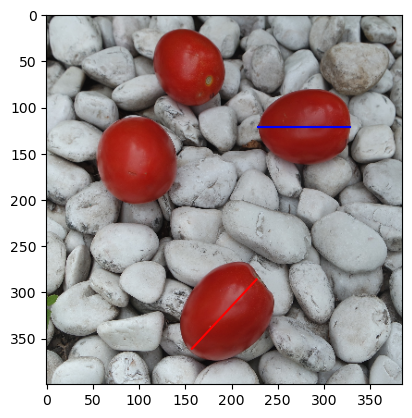

In [108]:
# Resultado final 

plt.imshow(image)
plt.plot(x4_d, y4_d, 'r')
plt.plot(x2_d, y2_d, 'b')


print("Reference points for object 2 (blue): (",corner1_2[1], ", ", corner1_2[0], ") ",
    "(",corner2_2[1], ", ", corner2_2[0], ")")
print("Reference points for object 4 (red): (",corner1_4[1], ", ", corner1_4[0], ") ",
    "(",corner2_4[1], ", ", corner2_4[0], ")")

print("Distance object 2 (blue) = ", distance_2, 'pixels')
print("Distance object 4 (red) = ", distance_4, 'pixels')